In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
dataset=pd.read_csv('./data2.csv')
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Create x and y variables
x = dataset.drop('diagnosis', axis=1).values
Y = dataset['diagnosis'].values

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x_2=sc.fit_transform(x)

In [4]:
# Determine Number of Components for DR
from sklearn.decomposition import PCA

#PCA Ratios
pca_none = PCA(n_components=None,random_state=100)
X_pca = pca_none.fit(x_2, Y)
pca_var_ratios = pca_none.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

#Number of components
n_comppca=select_n_components(pca_var_ratios, 0.95)

In [5]:
#Feature Distribution -PCA (Using Optimum Number)

'''
Each column of the matrix shows the weights in the linear 
combination which obtains the corresponding principal component
'''
pcaOpt = PCA(n_components=n_comppca,random_state=100)
X_pcaOpt = pcaOpt.fit(x_2, Y)
index=dataset.drop('diagnosis', axis=1).columns
FD=pd.DataFrame(np.round(pcaOpt.components_.T,2),index)
FD.columns += 1
FD.add_prefix('PC_')

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
radius_mean,0.22,-0.23,-0.01,0.04,0.04,0.02,-0.12,-0.01,-0.22,0.10
texture_mean,0.10,-0.06,0.06,-0.60,-0.05,-0.03,0.01,0.13,0.11,0.24
perimeter_mean,0.23,-0.22,-0.01,0.04,0.04,0.02,-0.11,-0.02,-0.22,0.09
area_mean,0.22,-0.23,0.03,0.05,0.01,-0.00,-0.05,0.03,-0.20,0.07
smoothness_mean,0.14,0.19,-0.10,0.16,-0.37,-0.29,-0.14,-0.29,0.01,-0.07
compactness_mean,0.24,0.15,-0.07,0.03,0.01,-0.01,0.03,-0.15,-0.17,0.01
concavity_mean,0.26,0.06,0.00,0.02,0.09,-0.01,-0.11,-0.07,0.04,-0.14
concave_points_mean,0.26,-0.03,-0.03,0.07,-0.04,-0.05,-0.15,-0.15,-0.11,0.01
symmetry_mean,0.14,0.19,-0.04,0.07,-0.31,0.36,-0.09,-0.23,0.26,0.57
fractal_dimension_mean,0.06,0.37,-0.02,0.05,-0.04,-0.12,0.30,-0.18,-0.12,0.08


In [6]:
#PCA BiPlot 

pca = PCA(n_components=2,random_state=100).fit(x_2)
x_new2 = pca.fit_transform(x_2)
reduced_data = pca.transform(x_2)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

def biplot(data, reduced_data, pca):

    #Set Figure Size
    fig, ax = plt.subplots(figsize = (15,10))

    #Create Scatter Plot
    scatter=plt.scatter(x_new2[:,0], x_new2[:,1], c = Y)
    labels = np.unique(Y)
    handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
    plt.legend(handles, labels)
    
    #Identify PCA Components
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 4.0, 4.5,

    # projections of the original features
    
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, 
                 head_length=0.2, linewidth=1, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, dataset.columns[i], color='black', 
                ha='left', va='center', fontsize=10)
    
    ax.set_xlabel("Dimension 1", fontsize=9)
    ax.set_ylabel("Dimension 2", fontsize=9)
    ax.set_title("PCA", fontsize=18);
    return ax

PCA BiPlot


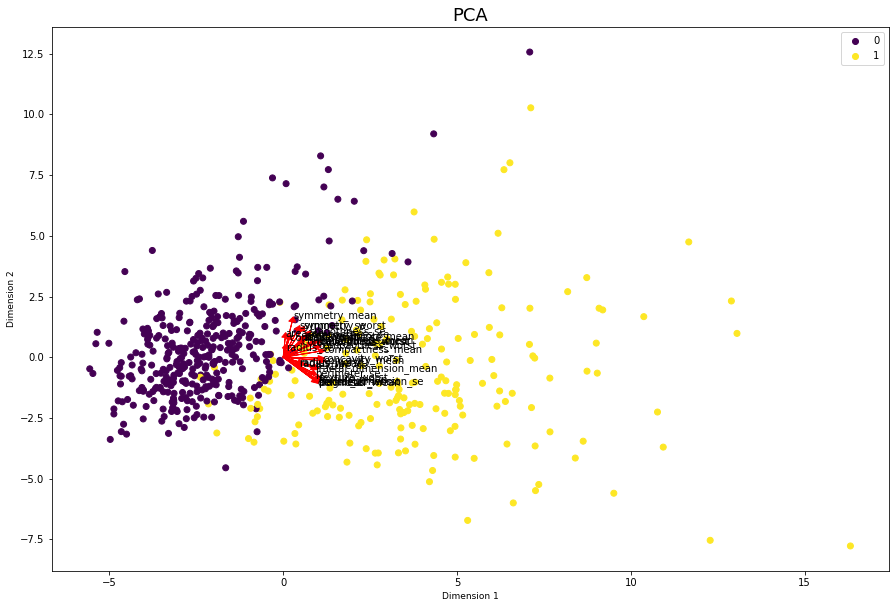

In [7]:
#Print BiPlot
print('PCA BiPlot')
biplot(x_2, reduced_data, pca)

The PCA Decomposition visualizer utilizes principal component analysis to decompose high dimensional data into two or three dimensions so that each instance can be plotted in a scatter plot. The use of PCA means that the projected dataset can be analyzed along axes of principal variation and can be interpreted to determine if spherical distance metrics can be utilized.

The PCA projection can be enhanced to a **biplot** whose points are the projected instances and whose vectors represent the structure of the data in high dimensional space. Here vectors for each feature in the dataset are drawn on the scatter plot in the direction of the maximum variance for that feature. These structures can be used to analyze the importance of a feature to the decomposition or to find features of related variance for further analysis.